In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('clean_smartphones.csv')

## Understanding the Data :

In [3]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [4]:
df.shape

(1020, 23)

In [5]:
# missing values percentage
(df.isnull().sum()/1020)*100

brand                     0.000000
processor_name            5.196078
processor_cores           3.921569
processor_speed           8.725490
os                       27.352941
ram                       2.647059
storage                   2.647059
battery_capacity          3.235294
battery_power            24.607843
DualSim                   0.000000
Volte                     0.000000
is_5G                     0.000000
is_Vo5G                   0.000000
wifi                      0.000000
ngc                       0.000000
irblaster                 0.000000
display_size              3.235294
display_resolution        3.235294
rear_camera               6.470588
front_camera              7.549020
memory_card_supported    27.352941
rating                   13.823529
price                     0.000000
dtype: float64

In [6]:
df.duplicated().sum()

2

In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  1018 non-null   object 
 1   processor_name         965 non-null    object 
 2   processor_cores        978 non-null    float64
 3   processor_speed        929 non-null    object 
 4   os                     740 non-null    object 
 5   ram                    991 non-null    object 
 6   storage                991 non-null    object 
 7   battery_capacity       985 non-null    object 
 8   battery_power          767 non-null    object 
 9   DualSim                1018 non-null   int64  
 10  Volte                  1018 non-null   int64  
 11  is_5G                  1018 non-null   int64  
 12  is_Vo5G                1018 non-null   int64  
 13  wifi                   1018 non-null   int64  
 14  ngc                    1018 non-null   int64  
 15  irbl

In [55]:
# vertu smartphone is clearly a outlier
# remove it for better analysis
df.drop([480],inplace=True)

## Exploratory Data Analysis :

### 1. Brand :

In [13]:
# 'OTHERS' category for smartphone 
main=['Xiaomi', 'Samsung', 'Vivo', 'Realme', 'OPPO', 'Motorola', 'Apple',
       'OnePlus', 'POCO', 'Tecno', 'iQOO', 'Nokia', 'Infinix']
df['brand'] = df['brand'].apply(lambda x:x if x in main else 'Others')

[(143, 'Others'), (137, 'Xiaomi'), (135, 'Samsung'), (111, 'Vivo'), (97, 'Realme'), (87, 'OPPO'), (53, 'Motorola'), (47, 'Apple'), (42, 'OnePlus'), (41, 'POCO')]


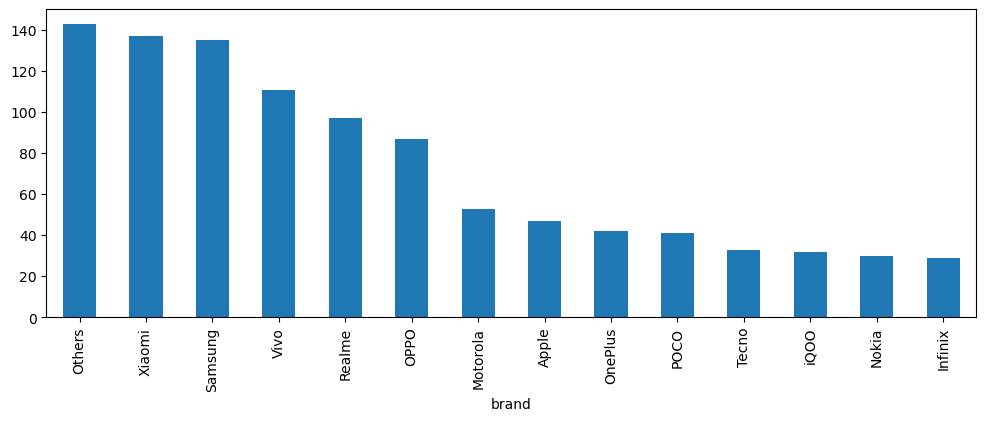

In [14]:
plt.figure(figsize=(12,4))
print([(df['brand'].value_counts().values[i],df['brand'].value_counts().index[i]) for i in range(10)])
df['brand'].value_counts().plot(kind='bar')
plt.show()

#### Price and Brand --

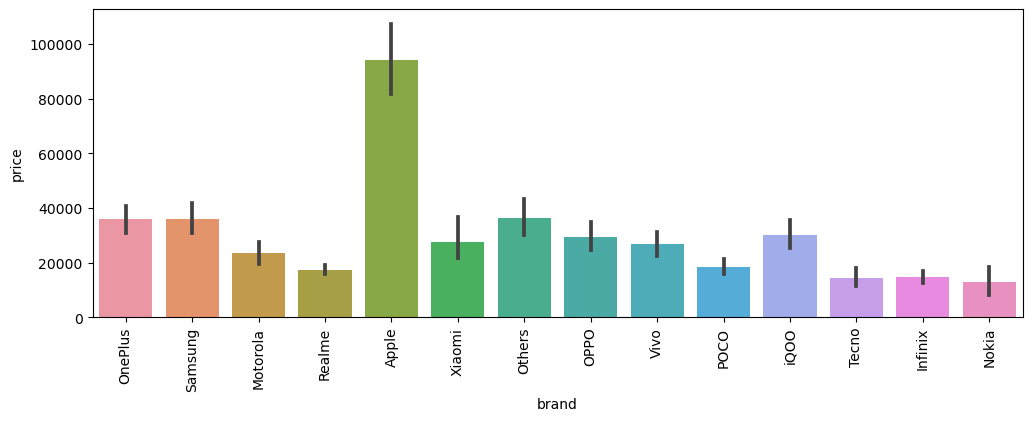

In [15]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['brand'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

### 2. Processor :

#### Processor_name ::

[(416, 'Snapdragon'), (202, 'Helio'), (175, 'Dimensity'), (50, 'Exynos'), (45, 'Bionic'), (35, 'Unisoc'), (24, 'Tiger'), (9, 'Google'), (7, 'Kirin'), (1, 'Fusion')]


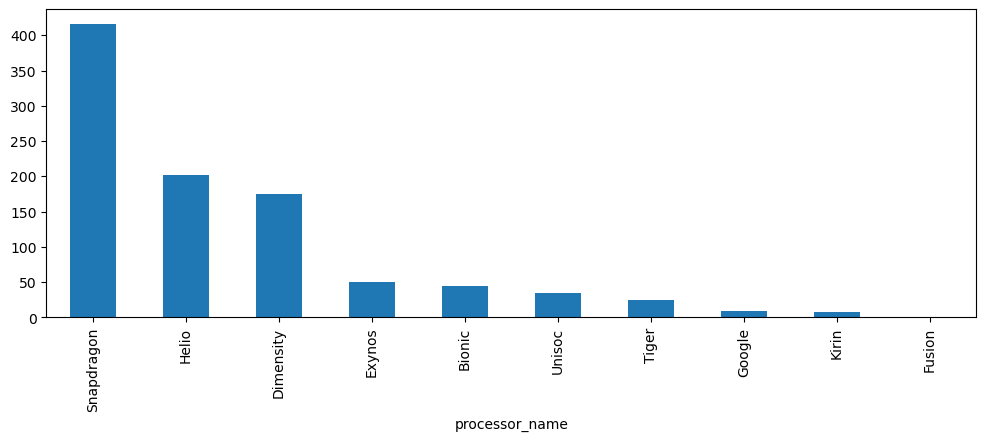

In [16]:
plt.figure(figsize=(12,4))
print([(df['processor_name'].value_counts().values[i],df['processor_name'].value_counts().index[i]) for i in range(10)])
df['processor_name'].value_counts().plot(kind='bar')
plt.show()

In [39]:
# brands whose 'processor_name' is missing
df[df['processor_name'].isnull()==True]['brand'].value_counts()

brand
Others      23
Samsung     15
Nokia       12
Motorola     1
Apple        1
Tecno        1
Name: count, dtype: int64

#### Price and Processor_name --

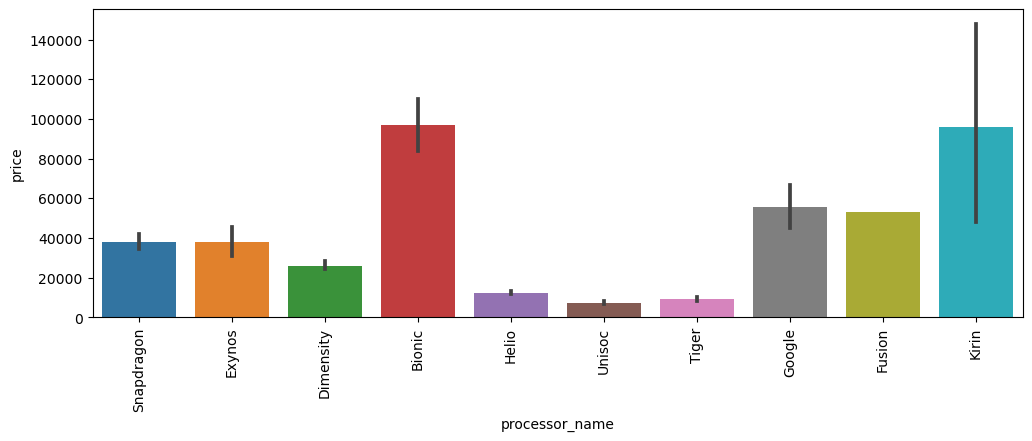

In [17]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['processor_name'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

#### Processor_cores ::

[(896, 8.0), (39, 6.0), (39, 4.0), (2, 2.0), (1, 1.0)]


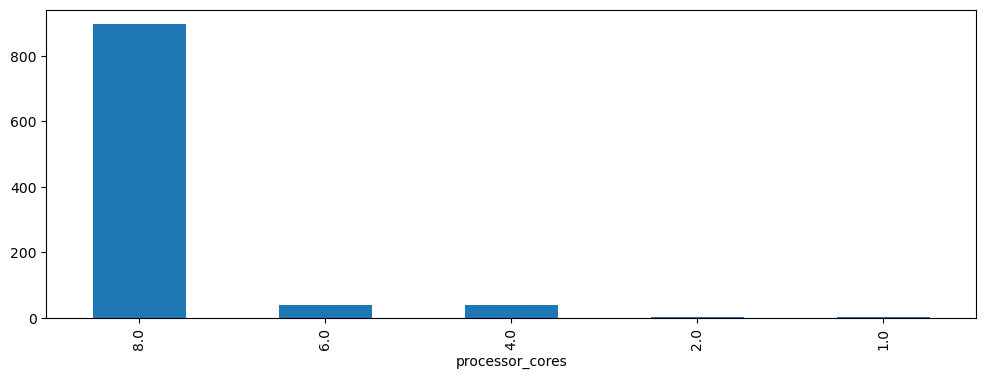

In [20]:
plt.figure(figsize=(12,4))
print([(df['processor_cores'].value_counts().values[i],df['processor_cores'].value_counts().index[i]) for i in range(5)])
df['processor_cores'].value_counts().plot(kind='bar')
plt.show()

In [29]:
# 'brand' of the missing 'processor_cores'
print(df[df['processor_cores'].isnull()==True]['brand'].value_counts())

brand
Nokia       15
Others      14
Apple        6
Samsung      3
Motorola     1
Xiaomi       1
Name: count, dtype: int64


#### Price and Processor_cores --

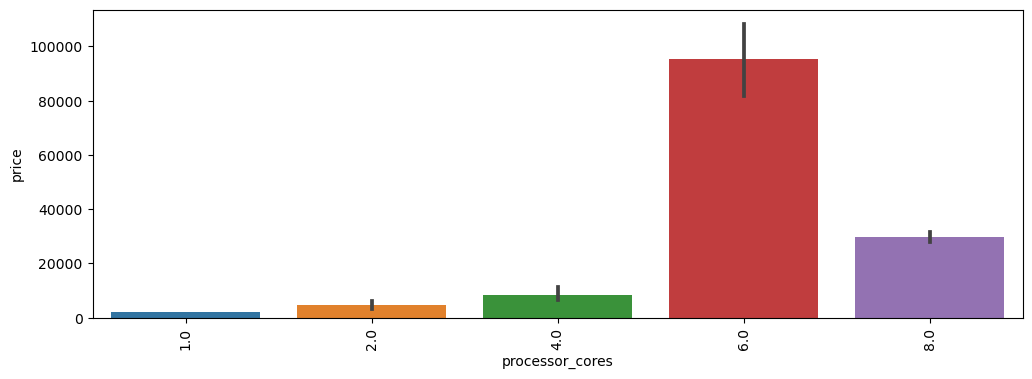

In [31]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['processor_cores'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

#### Processor_speed ::

In [37]:
df['processor_speed'] = df['processor_speed'].astype(np.float64)

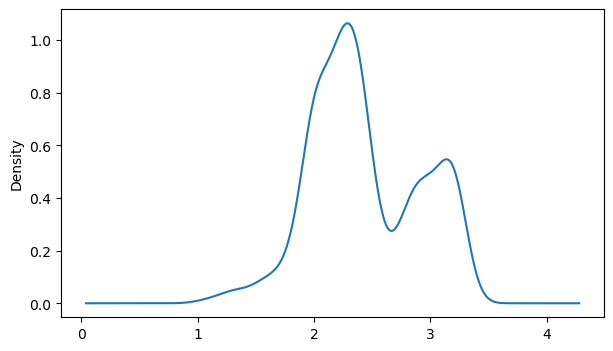

In [42]:
plt.figure(figsize=(7,4))
df['processor_speed'].plot(kind='kde')
plt.show()

In [44]:
# 'brand' of the missing 'processor_speed'
print(df[df['processor_speed'].isnull()==True]['brand'].value_counts())

brand
Others      29
Samsung     20
Apple       15
Nokia       15
Vivo         4
Motorola     1
OnePlus      1
Xiaomi       1
Tecno        1
POCO         1
iQOO         1
Name: count, dtype: int64


#### Price and Processor_speed --

<Axes: xlabel='processor_speed', ylabel='price'>

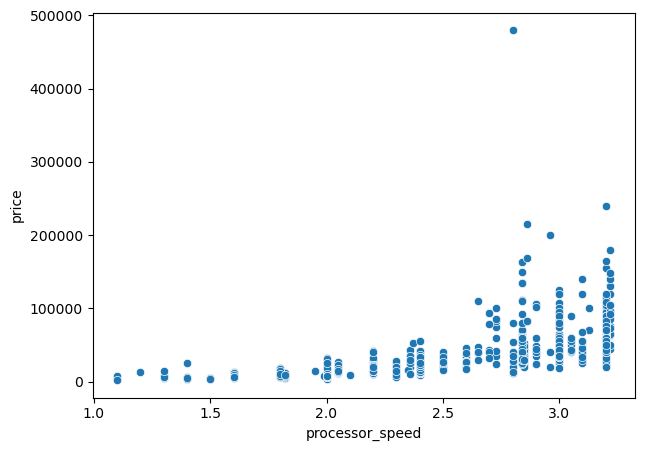

In [50]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['processor_speed'],y=df['price'])

### 3. OS :

In [60]:
df['os'].isnull().sum()

278

In [70]:
print(len(df['os'].unique()))
df['os'].value_counts()

29


os
Android v12                   287
Android v11                   232
Android v10                    58
Android v13                    45
Android v9.0 (Pie)             27
Android v10.0                  22
iOS v16                        14
Android v8.1 (Oreo)            10
iOS v15                        10
Android v8.0 (Oreo)             4
Android v11.0                   4
iOS v15.0                       3
iOS v13                         3
Android v6.0 (Marshmallow)      3
EMUI v12                        2
Harmony v2.0                    2
Android v5.1.1 (Lollipop)       2
Android v7.1 (Nougat)           1
HarmonyOS v2.0                  1
Hongmeng OS v4.0                1
Android v12.1                   1
Hongmeng OS v3.0                1
Android v5.1 (Lollipop)         1
iOS v17                         1
iOS v12.3                       1
iOS v13.0                       1
HarmonyOS v2                    1
Android v9 (Pie)                1
Name: count, dtype: int64

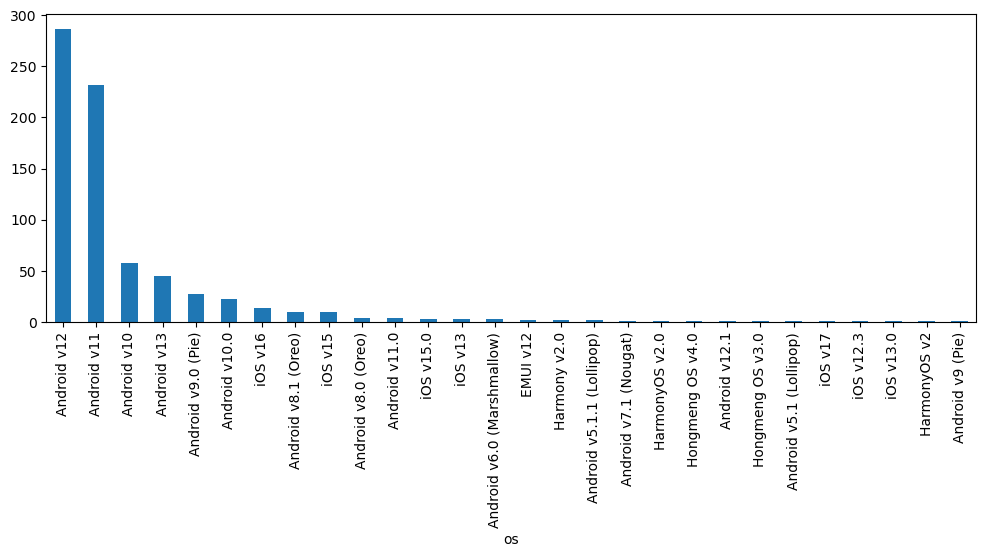

In [68]:
plt.figure(figsize=(12,4))
df['os'].value_counts().plot(kind='bar')
plt.show()

In [83]:
# 'os' --> 'os_name' and 'os_version'
def os_name(word):
    if word in ['Android ', 'iOS ']:
        return word.replace(' ','')
    elif word in ['HarmonyOS ', 'Hongmeng OS ', 'Harmony ','EMUI ']:
        return 'Others'
    else:
        return np.nan
    
df['os_name'] = df['os'].str.split('v',expand=True)[0].apply(os_name)

0       Android
1       Android
2       Android
3       Android
4       Android
         ...   
1013        NaN
1014    Android
1015    Android
1016    Android
1017    Android
Name: 0, Length: 1017, dtype: object

In [85]:
df['os'].str.split('v',expand=True)[1].unique()

array(['13', '12', '16', nan, '15', '11', '10', '2', '15.0', '10.0',
       '8.1 (Oreo)', '13.0', '11.0', '9.0 (Pie)', '12.1', '12.3', '17',
       '5.1 (Lollipop)', '5.1.1 (Lollipop)', '3.0', '8.0 (Oreo)',
       '6.0 (Marshmallow)', '2.0', '4.0', '7.1 (Nougat)', '9 (Pie)'],
      dtype=object)

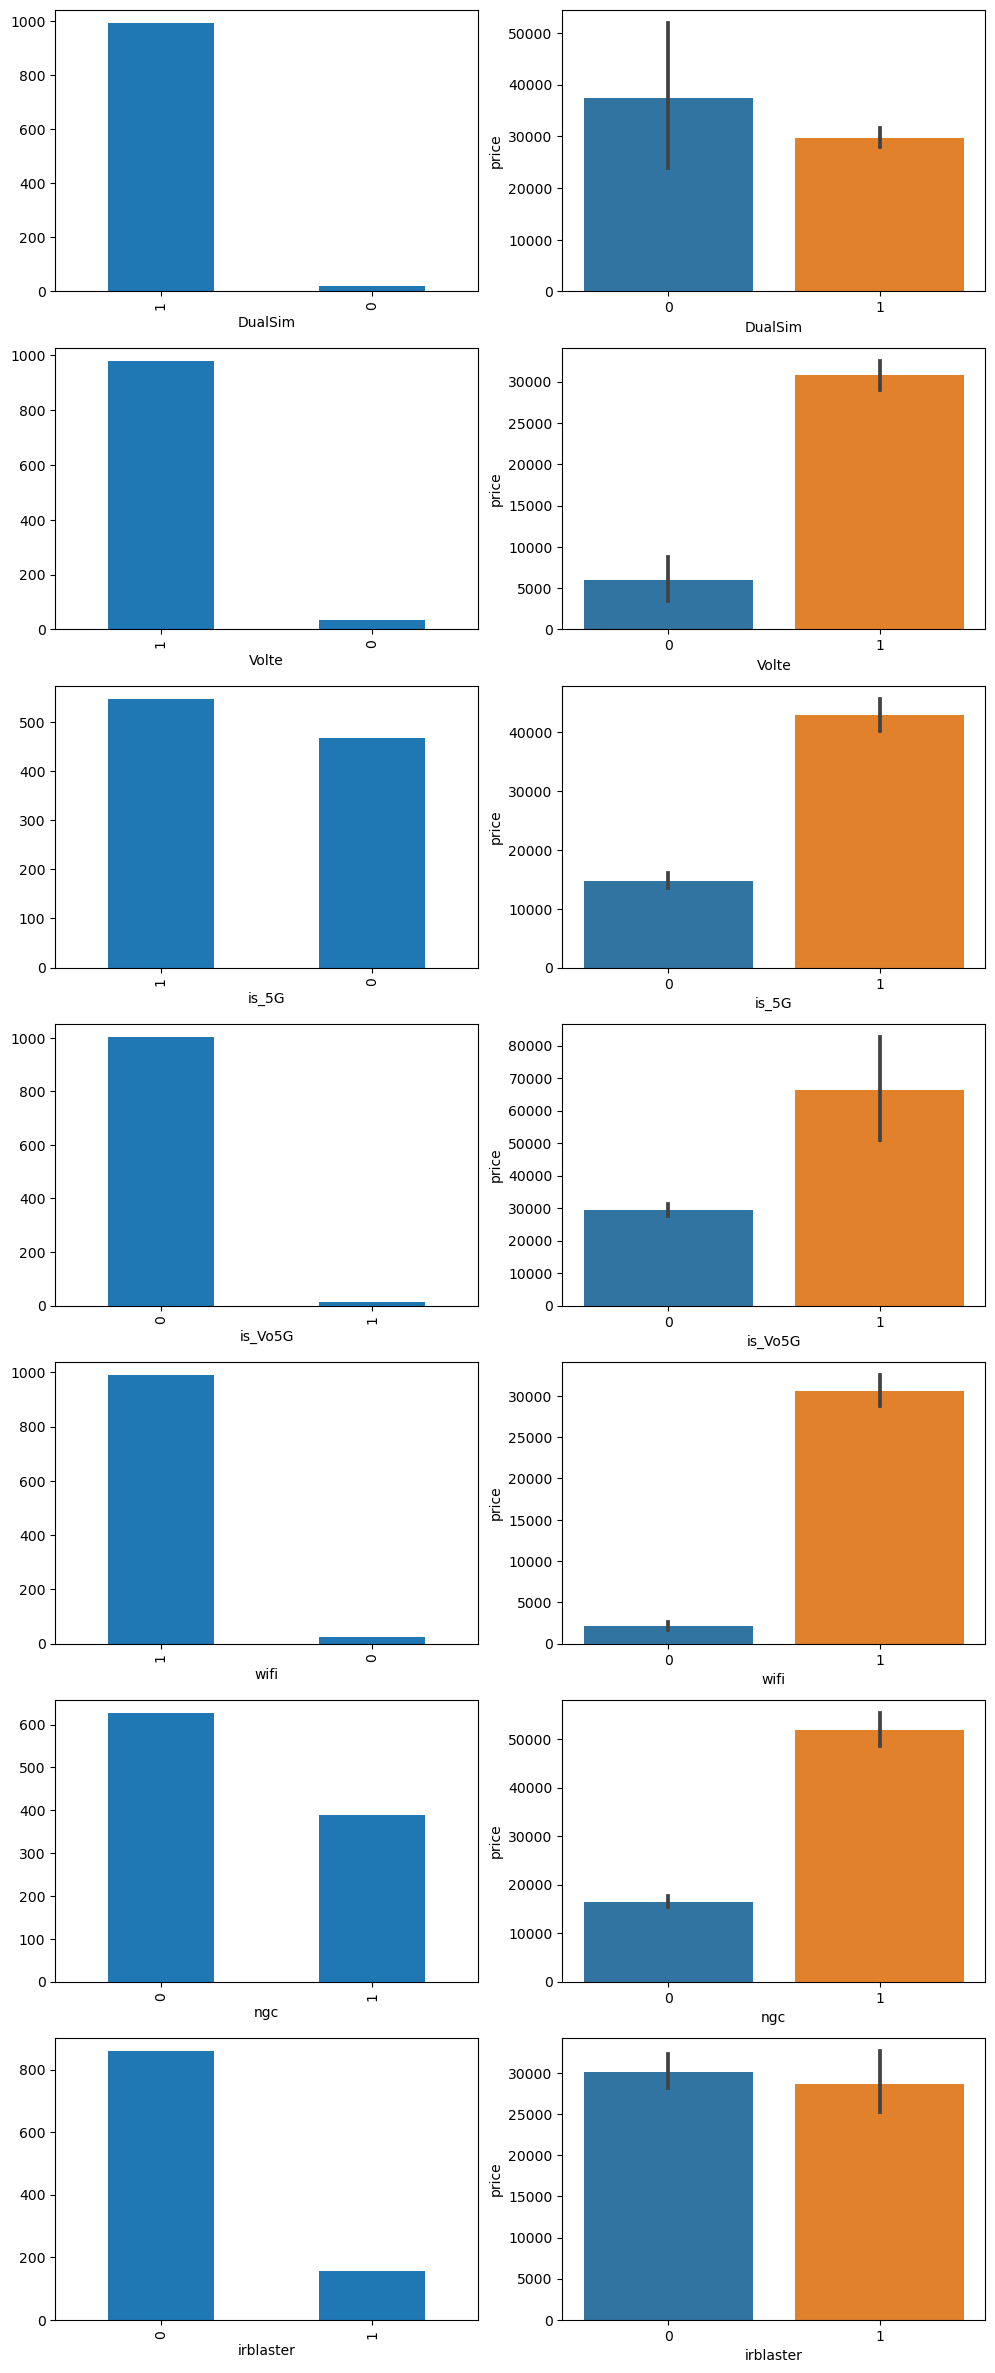

In [100]:
features = ['DualSim', 'Volte', 'is_5G', 'is_Vo5G', 'wifi', 'ngc', 'irblaster']
plt.figure(figsize=(12,30))
index=0
for i in range(1,15):
    if i%2!=0:
        plt.subplot(7,2,i)
        df[features[index]].value_counts().plot(kind='bar')
    else:
        plt.subplot(7,2,i)
        sns.barplot(x=df[features[index]],y=df['price'])
        index+=1